###### (3.12) Exercise:
Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
Perform a similar alanlaysis as above on this dataset with the following sections:

High level statistics of the dataset: 
number of points, 
numer of features, 
number of classes, 
data-points per class.

Explain our objective. 

Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# Parameters:

    Age of patient at time of operation (numerical)
    Patient’s year of operation (year — 1900, numerical)
    Number of positive auxillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

# Objective: 
    To identify if a patient would survive after 5 years based on Age, Operation_Year and Axillary_Points

# What is an Axillary Lymph
* A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread.
* If a woman diagnosed with breast cancer has node-positive disease, it means that their cancer has spread from their original breast tumor to the underarm lymph nodes on the side of their breast cancer.
* Source : https://www.google.com/search?client=firefox-b-d&biw=1433&bih=768&ei=RJ_aXMC7MoSlwgO334aQDg&q=what+is+positive+axillary+nodes+in+breast+cancer&oq=what+is+positive+axillary+nodes+in+breast+can&gs_l=psy-ab.1.0.33i22i29i30.4123908.4144045..4145570...0.0..0.232.6021.0j31j5......0....1..gws-wiz.......0i71j0i131j0j35i39j0i67j0i10i67j0i20i263j0i22i30j33i160j33i21j33i10i160j33i22i10i29i30.WRoUeVrRTEs

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

print(os.getcwd())
#read the file
hcs=pd.read_csv('haberman.csv', names= ['Age','Operation_Year','Axillary_Points','Survival_Status'])
# print the contents of csv
print(hcs)

C:\Users\ssinghai\Downloads\AI-ML
     Age  Operation_Year  Axillary_Points  Survival_Status
0     30              64                1                1
1     30              62                3                1
2     30              65                0                1
3     31              59                2                1
4     31              65                4                1
5     33              58               10                1
6     33              60                0                1
7     34              59                0                2
8     34              66                9                2
9     34              58               30                1
10    34              60                1                1
11    34              61               10                1
12    34              67                7                1
13    34              60                0                1
14    35              64               13                1
15    35              

In [34]:
#shape of the data

print(hcs.shape)


(306, 4)


In [45]:
#coloumn names

print(hcs.columns)

Index(['Age', 'Operation_Year', 'Axillary_Points', 'Survival_Status'], dtype='object')


In [39]:
#number of classes

print(hcs['Survival_Status'].unique())

[1 2]


In [38]:
#number of data points per class

print(hcs['Survival_Status'].value_counts())

1    225
2     81
Name: Survival_Status, dtype: int64


* Conclusion 1 : This is an Imbalanced dataset
* Conclusion 2 : 225 patients survived for more than 5 years and 81 patients died in less then 5 years

# PDF & CDF

counts :
 [ 0.00986558  0.01664817  0.02836355  0.03267974  0.03391294  0.02528055
  0.02528055  0.01109878  0.00431619  0.0012332 ]
sum of counts :
 0.188679245283
bin_edges :
 [ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]
pdf :
 [ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]


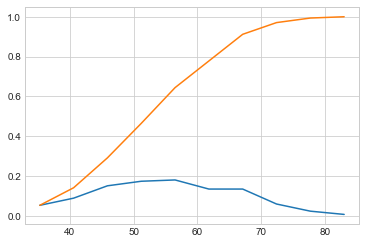

In [67]:
# PDF and CDF on the basis of Age

counts, bin_edges = np.histogram(hcs['Age'], bins=10, 
                                 density = True)
print("counts :\n",counts)
pdf = counts/(sum(counts))
print("sum of counts :\n",sum(counts))
print("bin_edges :\n",bin_edges)
print("pdf :\n",pdf);


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

[ 0.77124183  0.09803922  0.05882353  0.02614379  0.02941176  0.00653595
  0.00326797  0.          0.00326797  0.00326797]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


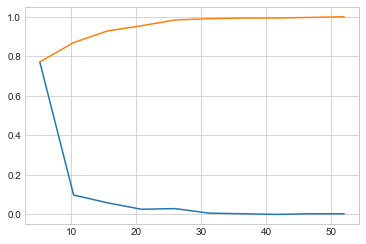

In [65]:
#PDF & CDF on the basisi of Axillary Nodes of patient
counts, bin_edges = np.histogram(hcs['Axillary_Points'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

# Box Plot

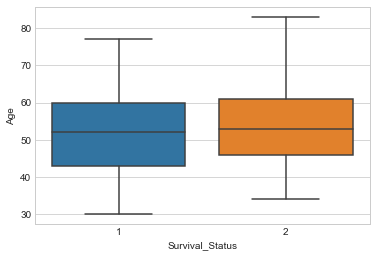

In [69]:
#Box-plot by Age

sb.boxplot(x='Survival_Status',y='Age', data=hcs)

plt.show()

plt.grid()

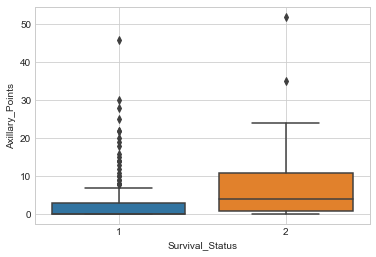

In [72]:
#Box-plot by Axillary_Points

sb.boxplot(x='Survival_Status',y='Axillary_Points', data=hcs)
plt.grid()
plt.show()



# VIOLIN PLOT

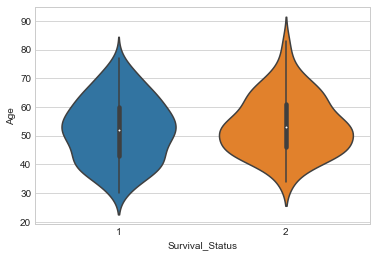

In [75]:
#plot by Age
sb.violinplot(x='Survival_Status',y='Age', data=hcs)

plt.show()
plt.grid()

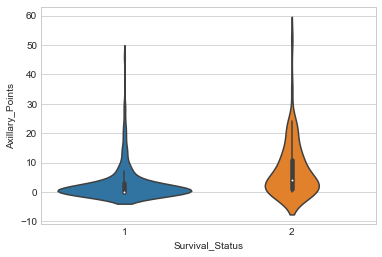

In [77]:
#plot by Axillary_Points
sb.violinplot(x='Survival_Status',y='Axillary_Points', data=hcs)

plt.show()

* Observation: Patients with 0 Axillary Points have higher chances of surviving more than 5 years

# BiVariate Analysis

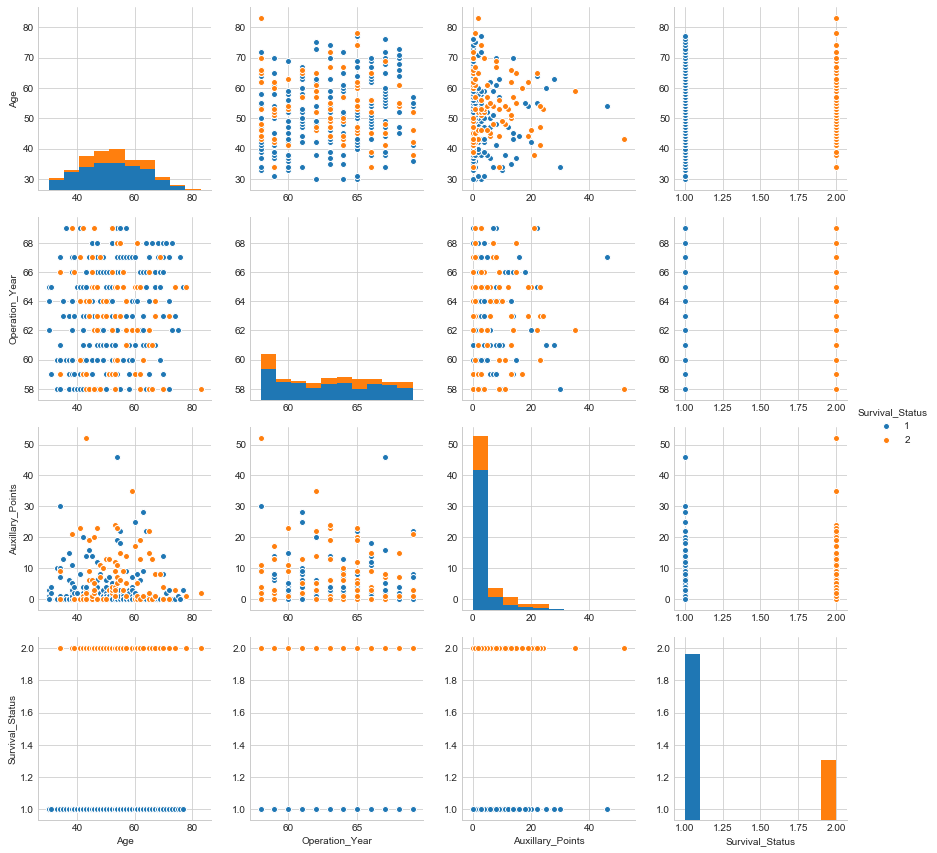

In [32]:
#Pair Plots
plt.close()
sb.set_style("whitegrid")
sb.pairplot(hcs,hue="Survival_Status",size=3)
plt.show()

* Observation:

        There is overlapping in all plots so in this scenario the Axillary_Points is best suited for identifying the survival status as it has least overlappping

# 2D Scatter Plot

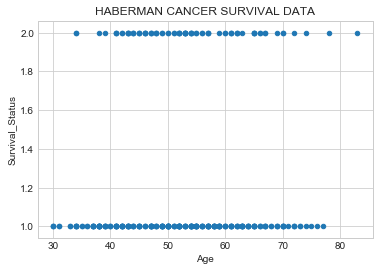

In [83]:
hcs.plot(kind='scatter', x='Age', y='Survival_Status') ;
plt.title("HABERMAN CANCER SURVIVAL DATA")
plt.legend()
plt.show()
plt.grid()

* Observation 
        If the age of patient is between 30 to 34 the chances of survival are more